VCB

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Tải dữ liệu (Không có thay đổi)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vcb.csv')

df = data[['Date','Close']]
df.rename(columns={'Close': 'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date',inplace=True)
df.set_index('Date',inplace=True)
y = df['Price'].values.reshape(-1, 1)

df['Lag1'] = df['Price'].shift(1)
df = df.dropna()
df

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
y_norm = scaler.fit_transform(y)

# Chia dữ liệu thành train và test (70/30)
train_size = int(len(y_norm) * 0.7)
test_size = int(len(y_norm) * 0.3)

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
train_data.shape, test_data.shape


# Tạo các chuỗi đầu vào và đầu ra

X_train = train_data['Lag1'].values
Y_train = train_data['Price'].values

# Xây dựng và huấn luyện mô hình Linear Regression
model = LinearRegression()

model.fit(X_train.reshape(-1,1), Y_train)
model.score(X_train.reshape(-1,1), Y_train)


0.9974578303706235

In [24]:
lag1_test = test_data['Lag1'].values.reshape(-1,1)

close_price_test = model.predict(lag1_test)
close_price_test
test_data['Close Predict'] = close_price_test.reshape(-1,1)



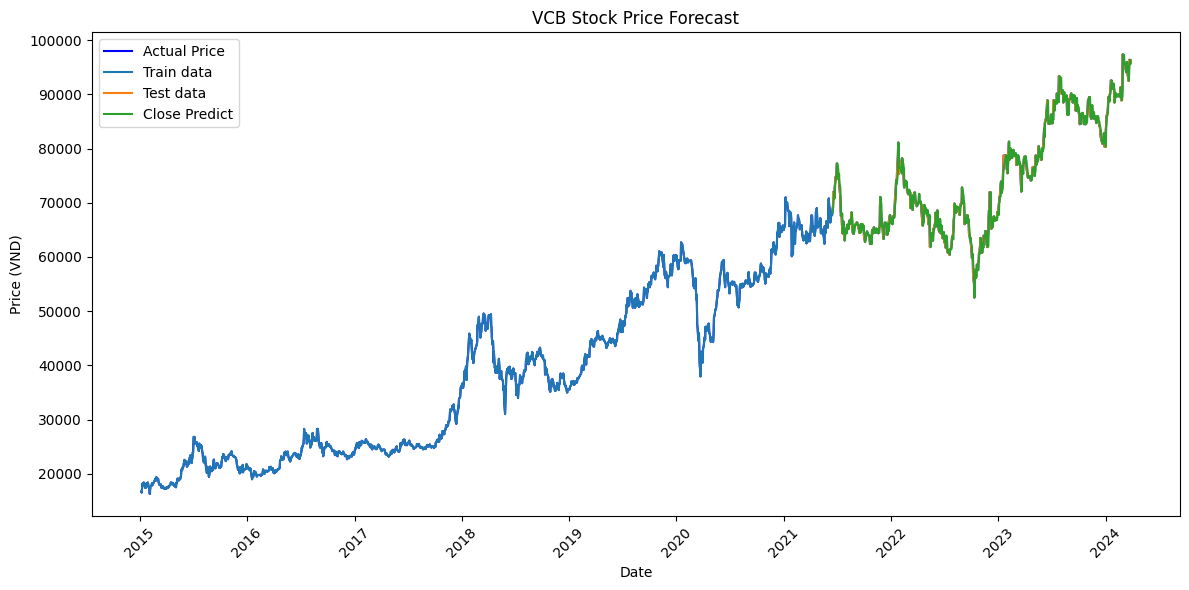

In [21]:
plt.figure(figsize=(12,6))
# Vẽ giá thực tế (Tất cả dữ liệu)
plt.plot(df.index, df['Price'], label='Actual Price', color='blue')

plt.plot(train_data['Price'], label='Train data')
plt.plot(test_data['Price'], label='Test data')
plt.plot(test_data['Close Predict'], label='Close Predict')

plt.legend()
plt.title('VCB Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


